## Test Mnist Data Class

In [1]:
import mnist_data

In [2]:
data = mnist_data.MnistData()

Done
Done
Done
Done
Pickle: dataset/mnist.pkl is being created.
Done.


In [3]:
img = data.dataset['test_images']
label = data.dataset['test_labels']

In [4]:
img.shape

(10000, 784)

In [5]:
import matplotlib.pyplot as plt

In [6]:
idx = 20

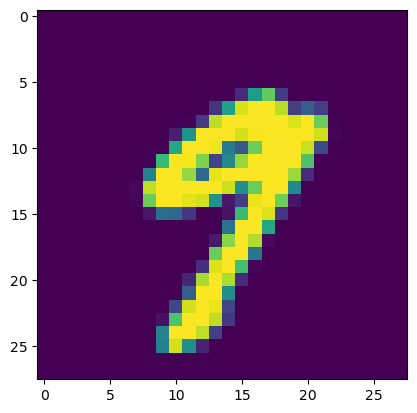

In [7]:
plt.imshow(img[idx].reshape(28,28))

In [8]:
print(f'label: {label[idx]}')

label: 9


## Let's predict!!

In [9]:
import pickle

In [12]:
def init_network():
    with open('model/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

In [13]:
net = init_network()

In [14]:
net

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [15]:
import numpy as np
import pickle

In [16]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [17]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [18]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

In [44]:
y_hat = predict(net, img[idx])

C:\Users\rusta\AppData\Local\Temp\ipykernel_15476\3886325312.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [20]:
print(y_hat)
p = np.argmax(y_hat)
print(p)

[5.8675450e-08 2.5420186e-05 1.6675299e-08 1.4469662e-04 3.5920436e-04
 4.2456735e-04 6.1695840e-09 8.9065135e-03 2.8191425e-04 9.8985767e-01]
9


In [21]:
import numpy as np
import pickle

In [22]:
class Mnist():
    def __init__(self):
        self.data = mnist_data.MnistData()
        self.params = {}


    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))


    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a/np.sum(exp_a)
    

    def load(self):
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    
    def init_network(self):
        with open('model/sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)
    

    def predict(self, x):
        w1, w2, w3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.softmax(a3)

        return y   

In [23]:
mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [47]:
idx = 21
x = test_images[idx]
y = test_labels[idx]

In [40]:
y_hat = mnist.predict(x)

In [26]:
y_one_hot = np.argmax(y)
p = np.argmax(y_hat)

The image 21 is 6. The groud truth is 6.


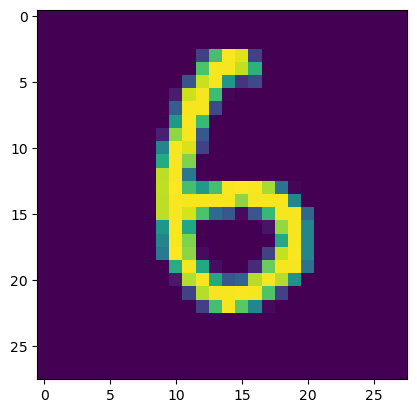

In [27]:
print(f'The image {idx} is {y_one_hot}. The groud truth is {p}.')
plt.imshow(x.reshape(28, 28))

In [28]:
import mnist

In [29]:
mnist = Mnist()
mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


## Numpy Axis

In [30]:
a = np.array( [[1, 2, 3], \
               [4, 5, 6]])

In [31]:
np.sum(a)

21

In [32]:
np.sum(a, axis=0)

array([5, 7, 9])

In [33]:
np.sum(a, axis=1)

array([ 6, 15])

## Predict with Batch

In [34]:
import mnist

mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [35]:
test_images.shape

(10000, 784)

In [36]:
batch_size = 5
x = test_images[0:10]
y = test_labels[0:10]

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_hat_batch = mnist.predict(x_batch)
    p = np.argmax(y_hat_batch, axis=1)
    print(p)

[7 2 1 0 4]
[1 4 9 6 9]


In [37]:
print(np.argmax(y, axis=1))

[7 2 1 0 4 1 4 9 5 9]


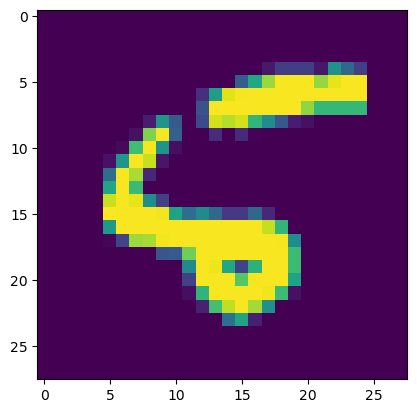

In [38]:
plt.imshow(x[8].reshape(28,28))

## Test Handwriting Images

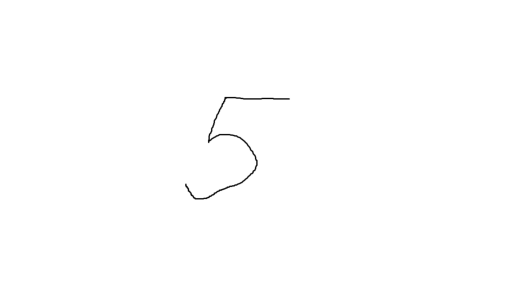

In [57]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("CustomMNISTSamples/Digit5/5_2.png")

plt.imshow(image)
plt.axis('off')
plt.show()

Change the formatting of the above image

In [60]:
new_image = image.convert('L') 
new_image = new_image.resize((28,28)) 
new_image

In [66]:
new_image = np.array(new_image)
new_image = 255 - new_image
new_image

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  

In [67]:
new_image = (new_image - np.min(new_image)) * (255 / (np.max(new_image) - np.min(new_image)))
new_image = new_image.astype(np.float32) / 255.0  
new_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
new_image = new_image.flatten() 
new_image

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Make prediction for image using mnist class

In [69]:
mnist = Mnist()
mnist.init_network()

y_hat = mnist.predict(new_image)
y_hat

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


array([0.0031962 , 0.10021999, 0.04164683, 0.0076276 , 0.03513079,
       0.57659125, 0.08205353, 0.08056928, 0.0442536 , 0.02871089],
      dtype=float32)

In [71]:
p = np.argmax(y_hat)
p

5